# Citbike System Data Analysis

In [39]:
# Load packages
import sys
sys.path.append('../code/')
from loadEngine import *
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Get a sqlalchemy Engine instance.
engine = loadEngine("bike.sqlite")

In [16]:
query = """select * from bike limit 10"""
view = pd.read_sql_query(query, engine)
view

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,3160,Central Park West & W 76 St,40.778968,-73.973747,3283,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1
1,1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,519,Pershing Square North,40.751873,-73.977706,518,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1
2,2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,3171,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1
3,3,2719,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,504,1 Ave & E 16 St,40.732219,-73.981656,3709,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1
4,4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,229,Great Jones St,40.727434,-73.993790,503,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1
5,5,535,2019-01-01 00:08:33.1790,2019-01-01 00:17:28.3540,3630,Frederick Douglass Blvd & W 115 St,40.803865,-73.955931,3529,Lenox Ave & W 130 St,40.810792,-73.943068,30315,Subscriber,1989,2
6,6,280,2019-01-01 00:09:21.0060,2019-01-01 00:14:01.1510,3675,3 Ave & E 95 St,40.784597,-73.949685,3288,E 88 St & 1 Ave,40.778301,-73.948813,35391,Subscriber,1987,1
7,7,1547,2019-01-01 00:11:22.9070,2019-01-01 00:37:10.0550,285,Broadway & E 14 St,40.734546,-73.990741,3358,Garfield Pl & 8 Ave,40.671198,-73.974841,35551,Subscriber,1981,1
8,8,300,2019-01-01 00:12:17.9310,2019-01-01 00:17:18.8300,3394,Columbia St & W 9 St,40.676999,-74.006471,3398,Smith St & 9 St,40.674696,-73.997858,18636,Subscriber,1990,2
9,9,123,2019-01-01 00:12:19.6030,2019-01-01 00:14:23.1040,432,E 7 St & Avenue A,40.726218,-73.983799,3656,E 2 St & Avenue A,40.723077,-73.985836,35206,Subscriber,1987,1


In [17]:
group_cb_month = pd.read_sql_query('SELECT [starttime], strftime(\'%m\', starttime) AS month, '
                       'COUNT(*) as `Number of Trips` '
                       'FROM bike '
                       'GROUP BY month '
                       'ORDER BY month ', engine)
group_cb_month

,starttime,month,Number of Trips
0,2019-01-31 23:38:42.1770,01,967287
1,2019-02-28 23:59:55.0050,02,843744
2,2019-03-31 23:59:58.0230,03,1227960
3,2019-04-30 23:59:50.8000,04,1666094
4,2019-05-31 23:59:55.5500,05,1824563
5,2019-06-30 23:59:54.3670,06,2025370
6,2019-07-31 23:59:57.4870,07,2081064
7,2019-08-31 23:59:59.4520,08,2244224
8,2019-09-30 23:59:55.3740,09,2344900
9,2019-10-31 23:59:51.5170,10,1992573


In [35]:
q = """
SELECT starttime, strftime(\'%m\', starttime) as 'month',
COUNT(*) as 'Number of Customer Trip'
FROM bike
where usertype = 'Customer'
GROUP BY month
ORDER BY month
"""
customertrip = pd.read_sql_query(q, engine)
customertrip

,starttime,month,Number of Customer Trip
0,2019-01-31 23:52:01.9400,01,40173
1,2019-02-28 23:52:09.3650,02,40898
2,2019-03-31 23:59:11.2210,03,101515
3,2019-04-30 23:59:12.0740,04,224240
4,2019-05-31 23:59:45.4930,05,285826
5,2019-06-30 23:59:32.0800,06,344969
6,2019-07-31 23:59:32.9270,07,364638
7,2019-08-31 23:59:58.3620,08,432086
8,2019-09-30 23:59:55.3740,09,402163
9,2019-10-31 23:59:17.0470,10,284246


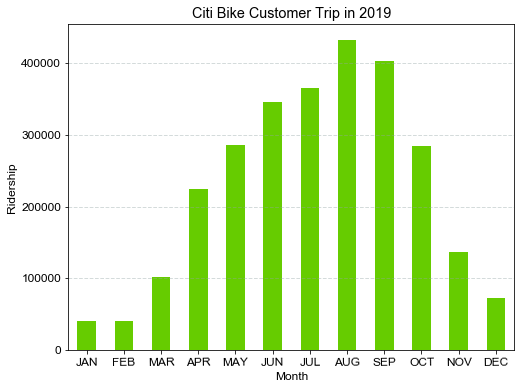

In [44]:
plt.rc('font', family='arial', size=12)
customertrip.plot(kind='bar',figsize=(8,6),color='#66CC00',legend=False, rot=1)
plt.xlabel('Month')
plt.ylabel('Ridership')
plt.title('Citi Bike Customer Trip in 2019')
plt.xticks(np.arange(0,12,1), 
           ('JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC') )
plt.grid(color='#95a5a6',linestyle='--', linewidth=1 ,axis='y',alpha=0.4)
plt.show()

In [41]:
q = """
SELECT starttime, strftime(\'%m\', starttime) as 'month',
COUNT(*) as 'Number of Subscriber Trip'
FROM bike
where usertype = 'Subscriber'
GROUP BY month
ORDER BY month
"""
subscribertrip = pd.read_sql_query(q, engine)
subscribertrip

,starttime,month,Number of Customer Trip
0,2019-01-31 23:38:42.1770,01,927114
1,2019-02-28 23:59:55.0050,02,802846
2,2019-03-31 23:59:58.0230,03,1126445
3,2019-04-30 23:59:50.8000,04,1441854
4,2019-05-31 23:59:55.5500,05,1538737
5,2019-06-30 23:59:54.3670,06,1680401
6,2019-07-31 23:59:57.4870,07,1716426
7,2019-08-31 23:59:59.4520,08,1812138
8,2019-09-30 23:59:42.2520,09,1942737
9,2019-10-31 23:59:51.5170,10,1708327


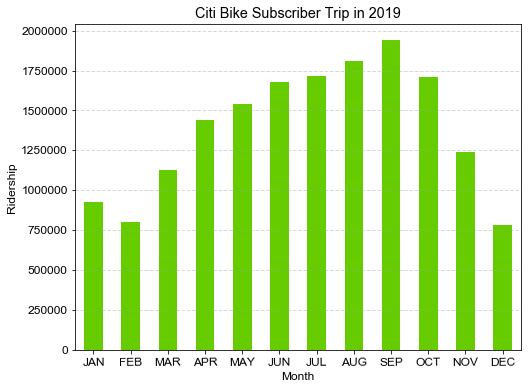

In [42]:
plt.rc('font', family='arial', size=12)
subscribertrip.plot(kind='bar',figsize=(8,6),color='#66CC00',legend=False, rot=1)
plt.xlabel('Month')
plt.ylabel('Ridership')
plt.title('Citi Bike Subscriber Trip in 2019')
plt.xticks(np.arange(0,12,1), 
           ('JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC') )
plt.grid(color='#95a5a6',linestyle='--', linewidth=1 ,axis='y',alpha=0.4)
plt.show()